In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [3]:
import pandas as pd
import numpy as np
from datasets import Dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datasets.utils.logging import disable_progress_bar
disable_progress_bar()

from transformers import AutoTokenizer
label2id = {"negative": 0, "neutral": 1, "positive": 2}
id2label = {0: "negative", 1: "neutral", 2: "positive"}

## Data preparation

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Newton/CzechMedia/data/čd_analysisv2.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Newton/CzechMedia/data/čeps_analysisv2.csv")

First dataset is too big, it contains 2500 rows before preprocessing, it will further triple in size (each row has 3 aspects). That's why from this dataset, there will be randomly taken fifth of the dataset. Later it will be concated with the other dataset, making a dataset from media domain

In [ ]:
df1, temp_df = train_test_split(df1, test_size=0.8, random_state=42)

In [ ]:
# Function for seperating aspect and sentiment from the original data and creating usable dataset
def process_aspect_sentiment(dataset):
    new_aspects = []
    new_labels = []
    new_text = []
    i = 0

    for index, row in dataset.iterrows():
        aspects_sentiments = row['aspekty_a_sentimenty']
        text = row['shrnutí']

        aspect_sentiment_pairs = aspects_sentiments.split(' | ')

        for pair in aspect_sentiment_pairs:
            aspect, sentiment = pair.split('(')
            sentiment = sentiment.strip(')')

            new_aspects.append(aspect.strip())
            new_labels.append(sentiment.strip())
            new_text.append(text)

    corrected_df = pd.DataFrame({
        'aspect': new_aspects,
        'label': new_labels,
        'shrnutí': new_text
    })

    return corrected_df

In [ ]:
df1 = process_aspect_sentiment(df1)
df2 = process_aspect_sentiment(df2)

In [ ]:
df1

,aspect,label,shrnutí
0,výpadky ETCS,velmi pozitivní,"Celkově se železniční doprava posouvá kupředu,..."
1,souběžný provoz systémů,velmi pozitivní,"Celkově se železniční doprava posouvá kupředu,..."
2,bezpečnost železniční dopravy,velmi negativní,"Celkově se železniční doprava posouvá kupředu,..."
3,změna dopravce,neutrální,Dopravní obslužnost v regionu prochází několik...
4,úprava jízdního řádu,neutrální,Dopravní obslužnost v regionu prochází několik...
...,...,...,...
1543,bezpečnost,neutrální,Při plánování výletu do dané lokality je dobré...
1544,cestování,neutrální,Při plánování výletu do dané lokality je dobré...
1545,mírová jednání,velmi pozitivní,Situace se vyvíjí a je nutné sledovat nejnověj...
1546,muniční iniciativa,neutrální,Situace se vyvíjí a je nutné sledovat nejnověj...


In [ ]:
df2

,aspect,label,shrnutí
0,obnova dodávek,neutrální,Situace v energetice se stabilizuje. I přes ne...
1,příčina výpadku,velmi pozitivní,Situace v energetice se stabilizuje. I přes ne...
2,ztráta výkonu,neutrální,Situace v energetice se stabilizuje. I přes ne...
3,regionální zpravodajství,neutrální,Zpravodajství z regionu přineslo jako obvykle ...
4,sportovní události,neutrální,Zpravodajství z regionu přineslo jako obvykle ...
...,...,...,...
1156,příčina výpadku,velmi negativní,"Z nedávných událostí je patrné, že i když rozs..."
1157,obnova soustavy,velmi negativní,"Z nedávných událostí je patrné, že i když rozs..."
1158,fotovoltaické elektrárny,velmi pozitivní,S rostoucím povědomím o klimatických změnách a...
1159,akumulace energie,neutrální,S rostoucím povědomím o klimatických změnách a...


In [ ]:
df = pd.concat([df1, df2])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
label_change = {"velmi negativní": "negative", "velmi pozitivní": "positive", "neutrální": "neutral"}

In [ ]:
df.rename(columns={"shrnutí": "text"}, inplace=True)
df = df[['text', 'aspect', 'label']]
df.replace({"label": label_change}, inplace=True) # Change lable language from czech to english

In [ ]:
df

,text,aspect,label
0,Dnes byl den plný menších i větších událostí. ...,daňové přiznání,positive
1,"Celkově lze říci, že se současná situace ve sp...",financování sportu,negative
2,V železničním průmyslu se neustále diskutuje o...,ERTMS implementace,neutral
3,"Celkově se zdá, že současné trendy v dopravě s...",inovace v dopravě,neutral
4,"Bohužel, v poslední době jsme svědky znepokoji...",bezpečnost obyvatel,positive
...,...,...,...
2704,Energetická situace se vyvíjí. I přes občasné ...,nedostatek elektřiny,positive
2705,Nedávné události poukazují na smíšené trendy v...,financování železniční dopravy,positive
2706,Město nedávno čelilo dočasným dopravním omezen...,objízdná trasa,negative
2707,S ohledem na aktuální situaci je nezbytné prov...,ochrana infrastruktury,positive


In [ ]:
df.to_csv("/content/drive/MyDrive/Newton/CzechMedia/data/dataset.csv", index=False)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Newton/CzechMedia/data/dataset.csv")

## Basic information of the dataset
Such as text lengths, unique values, common aspects and value counts.

In [ ]:
df

,text,aspect,label
0,Dnes byl den plný menších i větších událostí. ...,daňové přiznání,positive
1,"Celkově lze říci, že se současná situace ve sp...",financování sportu,negative
2,V železničním průmyslu se neustále diskutuje o...,ERTMS implementace,neutral
3,"Celkově se zdá, že současné trendy v dopravě s...",inovace v dopravě,neutral
4,"Bohužel, v poslední době jsme svědky znepokoji...",bezpečnost obyvatel,positive
...,...,...,...
2704,Energetická situace se vyvíjí. I přes občasné ...,nedostatek elektřiny,positive
2705,Nedávné události poukazují na smíšené trendy v...,financování železniční dopravy,positive
2706,Město nedávno čelilo dočasným dopravním omezen...,objízdná trasa,negative
2707,S ohledem na aktuální situaci je nezbytné prov...,ochrana infrastruktury,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2709 non-null   object
 1   aspect  2709 non-null   object
 2   label   2709 non-null   object
dtypes: object(3)
memory usage: 63.6+ KB


In [ ]:
df.nunique()

,0
text,903
aspect,1681
label,3


In [ ]:
df['label'].value_counts()

,count
label,
positive,937
neutral,893
negative,879


In [ ]:
print(f"Minimum length: {df['text'].apply(len).min()} char")
print(f"Average length: {df['text'].apply(len).mean():.1f} char")
print(f"Maximum length: {df['text'].apply(len).max()} char")
print(f"Minimum length: {df['text'].apply(lambda s: len(s.split())).min()} words")
print(f"Average length: {df['text'].apply(lambda s: len(s.split())).mean():.1f} words")
print(f"Maximum length: {df['text'].apply(lambda s: len(s.split())).max()} words")

Minimum length: 244 char
Average length: 529.2 char
Maximum length: 862 char
Minimum length: 34 words
Average length: 75.5 words
Maximum length: 125 words


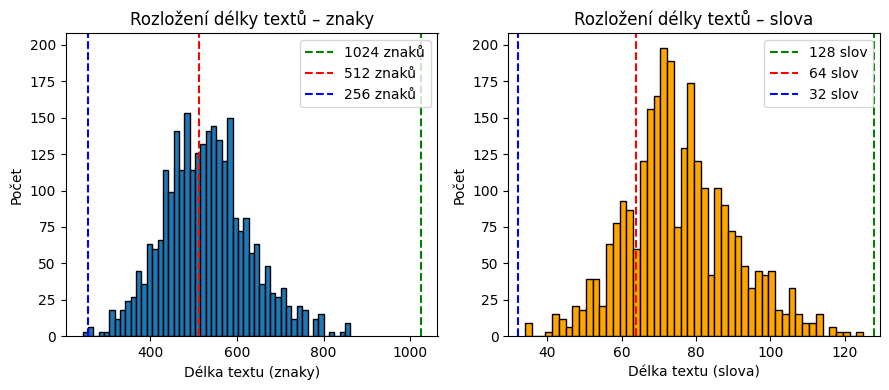

In [ ]:
# Graphs for lengths of text, in characters and in words
dff = df.copy()
dff["char_len"] = dff["text"].apply(len)
dff["word_len"] = dff["text"].apply(lambda s: len(s.split()))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

axes[0].hist(dff["char_len"], bins=50, edgecolor="black")
axes[0].axvline(1024,  color="g", linestyle="--", label="1024 znaků")
axes[0].axvline(512,  color="r", linestyle="--", label="512 znaků")
axes[0].axvline(256,  color="b", linestyle="--", label="256 znaků")
axes[0].set_xlabel("Délka textu (znaky)")
axes[0].set_ylabel("Počet")
axes[0].set_title("Rozložení délky textů – znaky")
axes[0].legend()

axes[1].hist(dff["word_len"], bins=50, edgecolor="black", color="orange")
axes[1].axvline(128,  color="g", linestyle="--", label="128 slov")
axes[1].axvline(64,  color="r", linestyle="--", label="64 slov")
axes[1].axvline(32,  color="b", linestyle="--", label="32 slov")
axes[1].set_xlabel("Délka textu (slova)")
axes[1].set_ylabel("Počet")
axes[1].set_title("Rozložení délky textů – slova")
axes[1].legend()

max_y = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_y)
axes[1].set_ylim(0, max_y)

axes[0].set_yticks(range(0, int(max_y), 25))
axes[1].set_yticks(range(0, int(max_y), 25))

plt.tight_layout()
plt.show()

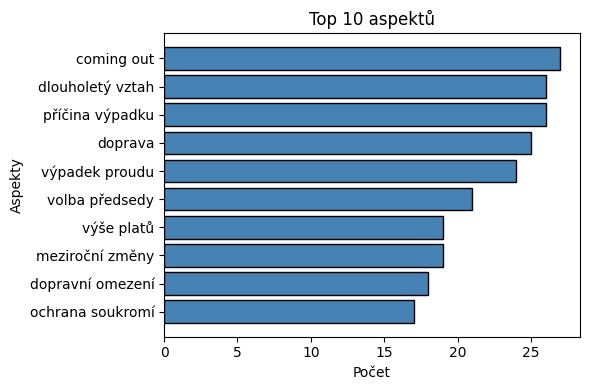

In [5]:
# Find the TOP 10 aspects
topN = 10
cat_counts = (df["aspect"].value_counts().head(topN).sort_values(ascending=True))

aspects = cat_counts.index.tolist()
frequencies = cat_counts.values.tolist()

plt.figure(figsize=(6, 4))

bar_color = "steelblue"
y_pos = range(len(aspects))

plt.barh(y_pos, frequencies, color=bar_color, edgecolor="black")
plt.yticks(y_pos, aspects)
plt.xlabel("Počet")
plt.ylabel("Aspekty")
plt.title(f"Top {topN} aspektů")
plt.tight_layout()
plt.show()

## Data seperation into train, val, test subsets

In [ ]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=1/3, random_state=42)
train_df.to_csv("/content/drive/MyDrive/Newton/CzechMedia/data/train.csv", index=False)
val_df.to_csv("/content/drive/MyDrive/Newton/CzechMedia/data/val.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Newton/CzechMedia/data/test.csv", index=False)
print(f"Train set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")

Train set size: 1896
Validation set size: 542
Test set size: 271


In [ ]:
print(f"Train set size: {train_df['label'].value_counts()}")
print(f"Validation set size: {val_df['label'].value_counts()}")
print(f"Test set size: {test_df['label'].value_counts()}")

Train set size: label
positive    659
neutral     622
negative    615
Name: count, dtype: int64
Validation set size: label
positive    192
neutral     176
negative    174
Name: count, dtype: int64
Test set size: label
neutral     95
negative    90
positive    86
Name: count, dtype: int64


## Difference of tokens needed for each sentence in the dataset using different tokenizers
For large version of models won't be shown any graphs, as they are using the same tokenizer as base version of the same model

In [15]:
dataset = Dataset.from_pandas(df)

In [16]:
# Function for printing graphs for the length of tokenized sentences
def plot_tokenized_text(tokenizername, data):
    tokenizer = AutoTokenizer.from_pretrained(tokenizername)

    def tokenize_function(example):
        combined_input = f"aspekt: {example['aspect']} text: {example['text']}"

        encoding = tokenizer(
            combined_input,
            truncation=True,
            max_length=512
        )
        # Convert label from string to int
        encoding["label"] = label2id[example["label"]]
        return encoding

    def tokenize_functionQA(example):
        question_string = f"Jaký je sentiment tohoto aspektu: {example['aspect']}?"

        encoding = tokenizer(
            text=example["text"],
            text_pair=question_string,
            truncation=True,
            max_length=512
        )
        # Convert label from string to int
        encoding["label"] = label2id[example["label"]]
        return encoding

    def getLength(dataset):
        lengths = []
        for i in range(len(dataset)):
          lengths.append(len(dataset[i]))
        return lengths

    dataset = data.map(tokenize_function, batched=False, )
    datasetQA = data.map(tokenize_functionQA, batched=False)

    length = getLength(dataset['input_ids'])
    lengthQA = getLength(datasetQA['input_ids'])

    max_length_count = sum(seq >= 256 for seq in length)
    print(f"Number of tokenized texts with length over 256 tokens: {max_length_count} from total of {len(length)}")
    max_length_countQA = sum(seq >= 256 for seq in lengthQA)
    print(f"Number of tokenized texts using QA with length over 256 tokens: {max_length_countQA} from total of {len(lengthQA)}")

    print(f"The maximum length of tokenized text in dataset with {tokenizername}: " + str(max(length)))
    print(f"The maximum length of tokenized text in dataset with {tokenizername} using QA: " + str(max(lengthQA)))

    global_max = max(max(length), max(lengthQA))
    global_min = min(min(length), min(lengthQA))
    bin_edges  = np.linspace(global_min, global_max, 50 + 1)

    fig, axes = plt.subplots(1, 2, figsize=(9, 4))

    counts1, _, _ = axes[0].hist(length, bins=bin_edges, edgecolor="black", color="steelblue", label='_nolegend_')
    counts2, _, _ = axes[1].hist(lengthQA, bins=bin_edges, edgecolor="black", color="forestgreen", label='_nolegend_')

    axes[0].set_title(tokenizername)
    axes[0].set_xlabel("Délka textu (tokeny)")
    axes[0].set_ylabel("Počet")
    axes[0].axvline(x=256, color='r', linestyle='--', label='256 tokenů')
    axes[0].legend(loc='upper right')

    axes[1].set_title(tokenizername + "QA")
    axes[1].set_xlabel("Délka textu (tokeny)")
    axes[1].set_ylabel("Počet")
    axes[1].axvline(x=256, color='r', linestyle='--', label='256 tokenů')
    axes[1].legend(loc='upper right')

    ymax = max(counts1.max(), counts2.max()) + 20
    axes[0].set_ylim(0, ymax)
    axes[1].set_ylim(0, ymax)

    plt.tight_layout()
    plt.show()

Number of tokenized texts with length over 256 tokens: 652 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 873 from total of 2709
The maximum length of tokenized text in dataset with bert-base-uncased: 367
The maximum length of tokenized text in dataset with bert-base-uncased using QA: 375


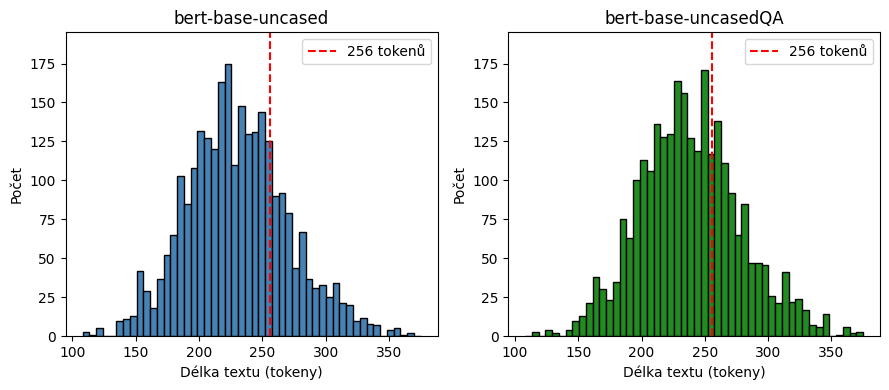

In [36]:
plot_tokenized_text("bert-base-uncased", dataset)

Number of tokenized texts with length over 256 tokens: 59 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 102 from total of 2709
The maximum length of tokenized text in dataset with bert-base-multilingual-cased: 290
The maximum length of tokenized text in dataset with bert-base-multilingual-cased using QA: 296


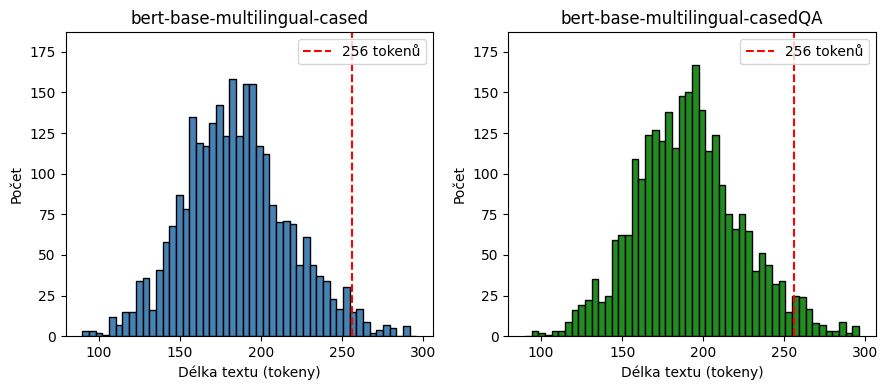

In [37]:
plot_tokenized_text("bert-base-multilingual-cased", dataset)

Number of tokenized texts with length over 256 tokens: 2278 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 2425 from total of 2709
The maximum length of tokenized text in dataset with roberta-base: 482
The maximum length of tokenized text in dataset with roberta-base using QA: 493


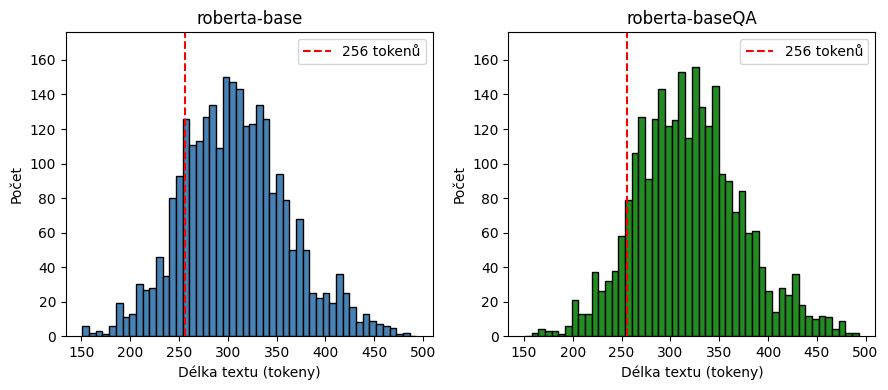

In [38]:
plot_tokenized_text("roberta-base", dataset)

Number of tokenized texts with length over 256 tokens: 0 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 0 from total of 2709
The maximum length of tokenized text in dataset with xlm-roberta-base: 237
The maximum length of tokenized text in dataset with xlm-roberta-base using QA: 244


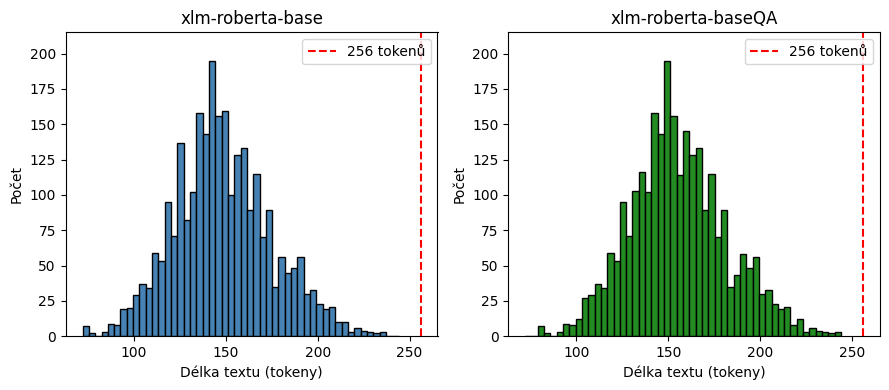

In [39]:
plot_tokenized_text("xlm-roberta-base", dataset)

Number of tokenized texts with length over 256 tokens: 844 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 1074 from total of 2709
The maximum length of tokenized text in dataset with microsoft/deberta-v3-base: 368
The maximum length of tokenized text in dataset with microsoft/deberta-v3-base using QA: 376


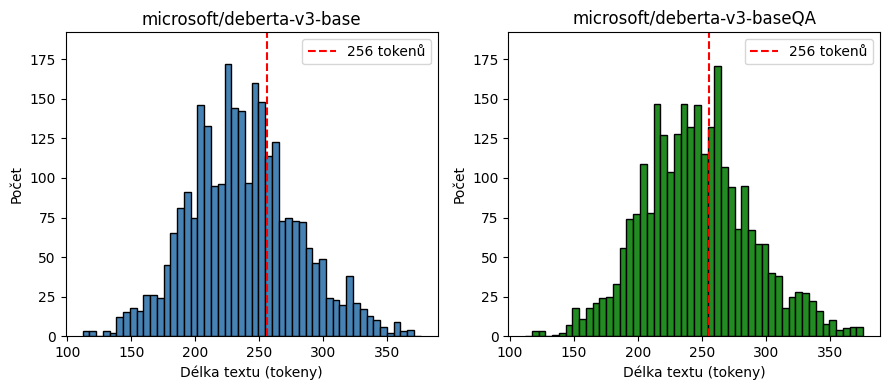

In [40]:
plot_tokenized_text("microsoft/deberta-v3-base", dataset)

Number of tokenized texts with length over 256 tokens: 1276 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 1546 from total of 2709
The maximum length of tokenized text in dataset with answerdotai/ModernBERT-base: 399
The maximum length of tokenized text in dataset with answerdotai/ModernBERT-base using QA: 408


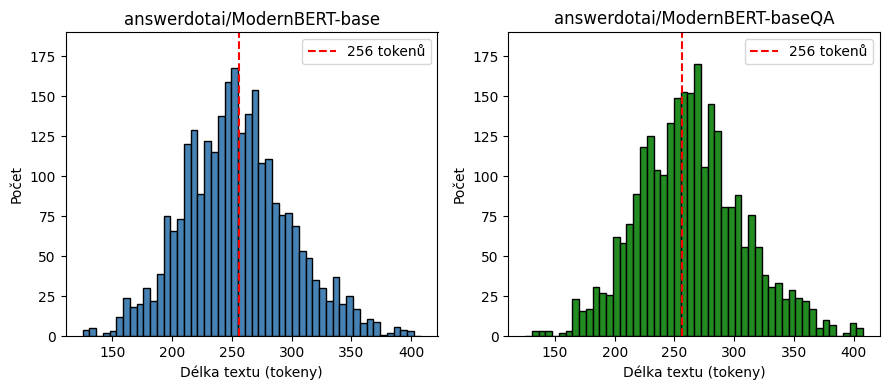

In [41]:
plot_tokenized_text("answerdotai/ModernBERT-base", dataset)

Number of tokenized texts with length over 256 tokens: 0 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 0 from total of 2709
The maximum length of tokenized text in dataset with DeepPavlov/bert-base-bg-cs-pl-ru-cased: 208
The maximum length of tokenized text in dataset with DeepPavlov/bert-base-bg-cs-pl-ru-cased using QA: 214


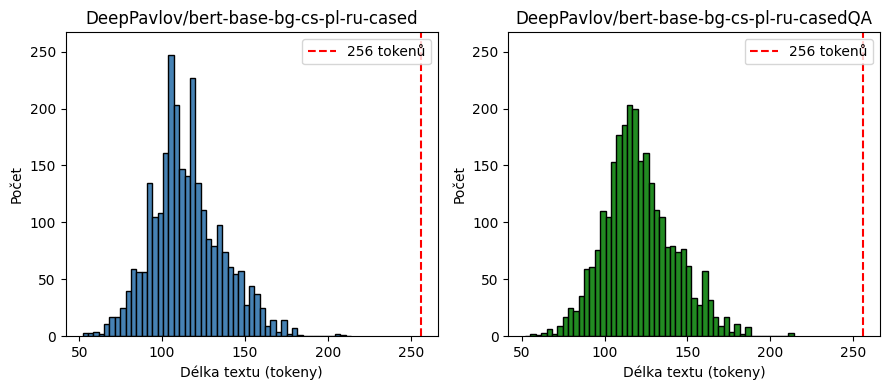

In [42]:
plot_tokenized_text("DeepPavlov/bert-base-bg-cs-pl-ru-cased", dataset)

Number of tokenized texts with length over 256 tokens: 0 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 0 from total of 2709
The maximum length of tokenized text in dataset with UWB-AIR/Czert-B-base-cased: 201
The maximum length of tokenized text in dataset with UWB-AIR/Czert-B-base-cased using QA: 207


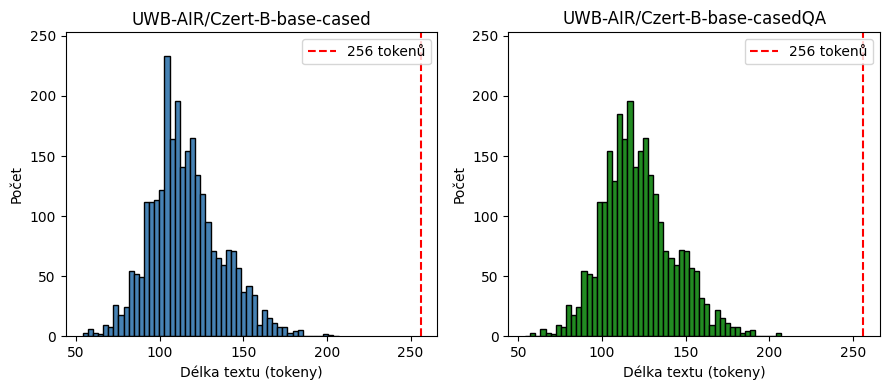

In [43]:
plot_tokenized_text("UWB-AIR/Czert-B-base-cased", dataset)

Number of tokenized texts with length over 256 tokens: 0 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 0 from total of 2709
The maximum length of tokenized text in dataset with ufal/robeczech-base: 188
The maximum length of tokenized text in dataset with ufal/robeczech-base using QA: 193


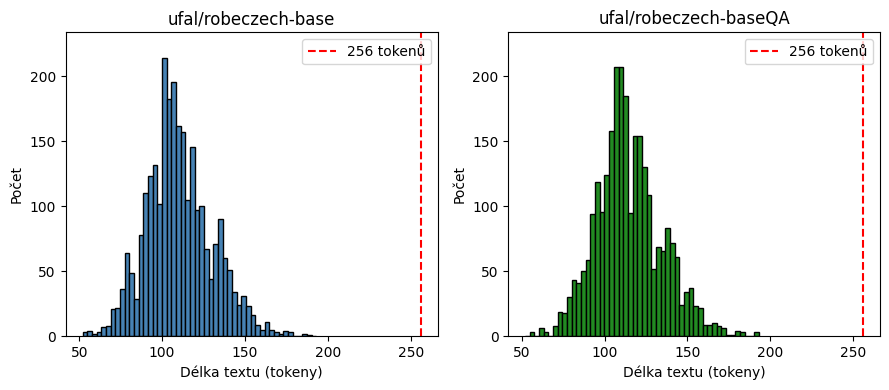

In [44]:
plot_tokenized_text("ufal/robeczech-base", dataset)

Number of tokenized texts with length over 256 tokens: 0 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 0 from total of 2709
The maximum length of tokenized text in dataset with fav-kky/FERNET-C5: 170
The maximum length of tokenized text in dataset with fav-kky/FERNET-C5 using QA: 175


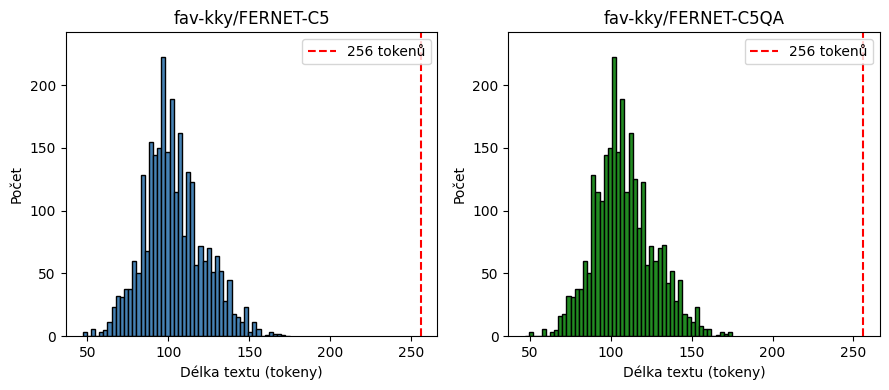

In [45]:
plot_tokenized_text("fav-kky/FERNET-C5", dataset)

Number of tokenized texts with length over 256 tokens: 0 from total of 2709
Number of tokenized texts using QA with length over 256 tokens: 0 from total of 2709
The maximum length of tokenized text in dataset with fav-kky/FERNET-C5-RoBERTa: 189
The maximum length of tokenized text in dataset with fav-kky/FERNET-C5-RoBERTa using QA: 194


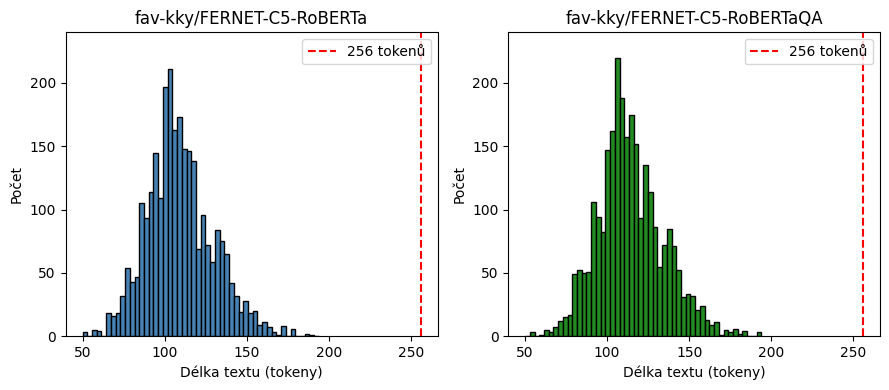

In [46]:
plot_tokenized_text("fav-kky/FERNET-C5-RoBERTa", dataset)

In [49]:
# Function for printing graphs for comparing the length of different tokenizors
def plot_tokenized_text_comparison(tokenizername1, tokenizername2, data):
    tokenizer1 = AutoTokenizer.from_pretrained(tokenizername1)
    tokenizer2 = AutoTokenizer.from_pretrained(tokenizername2)

    def encode(tokenizer):
        def tokenize(example):
            combined = f"aspekt: {example['aspect']} text: {example['text']}"
            out = tokenizer(combined, truncation=True, max_length=512)
            out["label"] = label2id[example["label"]]
            return out
        return tokenize

    def getLength(dataset):
        lengths = []
        for i in range(len(dataset)):
          lengths.append(len(dataset[i]))
        return lengths

    dataset1 = data.map(encode(tokenizer1), batched=False, )
    dataset2 = data.map(encode(tokenizer2), batched=False)

    length1 = getLength(dataset1['input_ids'])
    length2 = getLength(dataset2['input_ids'])

    print(f"The maximum length of tokenized text in dataset with {tokenizername1}: " + str(max(length1)))
    print(f"The maximum length of tokenized text in dataset with {tokenizername2}: " + str(max(length2)))

    global_max = max(max(length1), max(length2))
    global_min = min(min(length1), min(length2))
    bin_edges  = np.linspace(global_min, global_max, 50 + 1)

    fig, axes = plt.subplots(1, 2, figsize=(9, 4))

    counts1, _, _ = axes[0].hist(length1, bins=bin_edges, edgecolor="black", color="steelblue", label='_nolegend_')
    counts2, _, _ = axes[1].hist(length2, bins=bin_edges, edgecolor="black", color="forestgreen", label='_nolegend_')

    axes[0].set_title(tokenizername1)
    axes[0].set_xlabel("Délka textu (tokeny)")
    axes[0].set_ylabel("Počet")
    axes[0].axvline(x=256, color='r', linestyle='--', label='256 tokenů')
    axes[0].legend(loc='upper right')

    axes[1].set_title(tokenizername2)
    axes[1].set_xlabel("Délka textu (tokeny)")
    axes[1].set_ylabel("Počet")
    axes[1].axvline(x=256, color='r', linestyle='--', label='256 tokenů')
    axes[1].legend(loc='upper right')

    ymax = max(counts1.max(), counts2.max()) + 20
    axes[0].set_ylim(0, ymax)
    axes[1].set_ylim(0, ymax)

    plt.tight_layout()
    plt.show()

Comparison between the most effective tokenizer vs the least effective tokenizer

The maximum length of tokenized text in dataset with fav-kky/FERNET-C5-RoBERTa: 189
The maximum length of tokenized text in dataset with roberta-base: 482


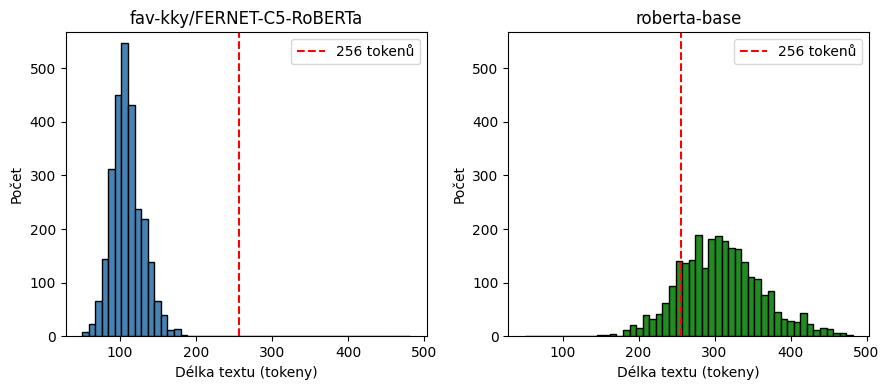

In [50]:
plot_tokenized_text_comparison("fav-kky/FERNET-C5-RoBERTa", "roberta-base", dataset)

### Comparison between tokenizors of different languages
Comparing same models architectures, but with regard to their differnet trainig datasets

#### BERT models

The maximum length of tokenized text in dataset with bert-base-uncased: 367
The maximum length of tokenized text in dataset with bert-base-multilingual-cased: 290


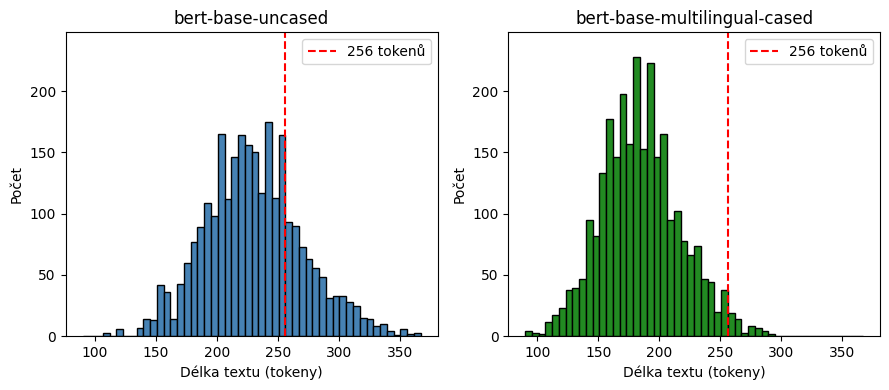

In [30]:
plot_tokenized_text_comparison("bert-base-uncased", "bert-base-multilingual-cased", dataset)

The maximum length of tokenized text in dataset with DeepPavlov/bert-base-bg-cs-pl-ru-cased: 208
The maximum length of tokenized text in dataset with UWB-AIR/Czert-B-base-cased: 201


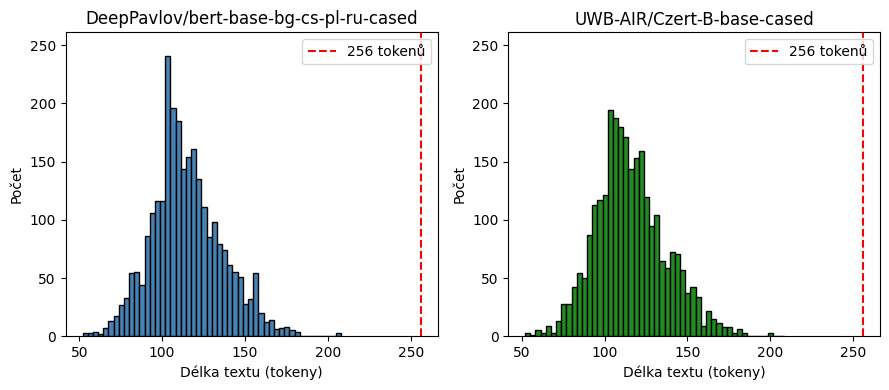

In [31]:
plot_tokenized_text_comparison("DeepPavlov/bert-base-bg-cs-pl-ru-cased", "UWB-AIR/Czert-B-base-cased", dataset)

The maximum length of tokenized text in dataset with UWB-AIR/Czert-B-base-cased: 201
The maximum length of tokenized text in dataset with fav-kky/FERNET-C5: 170


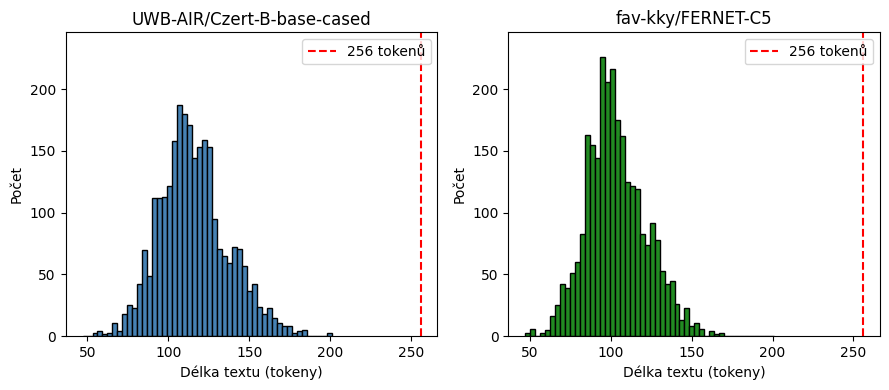

In [32]:
plot_tokenized_text_comparison("UWB-AIR/Czert-B-base-cased", "fav-kky/FERNET-C5", dataset)

#### RoBERTa models

The maximum length of tokenized text in dataset with roberta-base: 482
The maximum length of tokenized text in dataset with xlm-roberta-base: 237


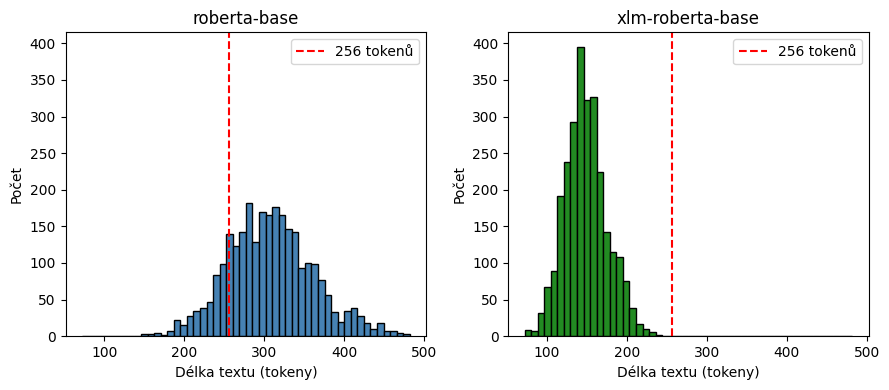

In [33]:
plot_tokenized_text_comparison("roberta-base", "xlm-roberta-base", dataset)

The maximum length of tokenized text in dataset with ufal/robeczech-base: 188
The maximum length of tokenized text in dataset with fav-kky/FERNET-C5-RoBERTa: 189


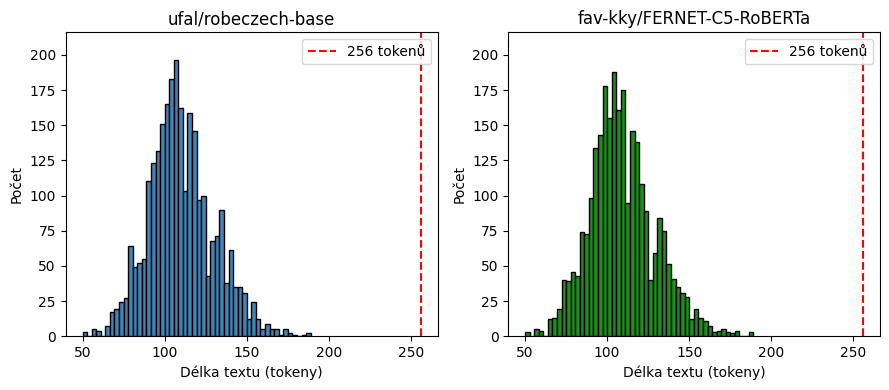

In [34]:
plot_tokenized_text_comparison("ufal/robeczech-base", "fav-kky/FERNET-C5-RoBERTa", dataset)

#### DeBERTaV3 vs ModernBERT - newest English models

The maximum length of tokenized text in dataset with microsoft/deberta-v3-base: 368
The maximum length of tokenized text in dataset with answerdotai/ModernBERT-base: 399


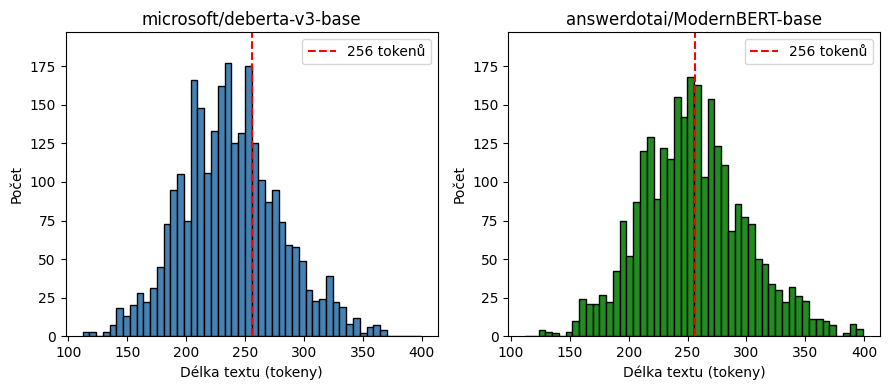

In [35]:
plot_tokenized_text_comparison("microsoft/deberta-v3-base", "answerdotai/ModernBERT-base", dataset)